In [22]:
import os
import pandas as pd
import shutil
import cv2  # If using OpenCV for image augmentation
from keras.preprocessing.image import ImageDataGenerator  # If using Keras

In [23]:
# Path to the directory containing the images
image_directory = 'C:/Users/Yuvraj Chugh/Desktop/Deep Learning/plant-pathology-2021-fgvc8/train_images'

# Path to the CSV file containing class labels (e.g., 'image_file', 'class')
csv_file_path = 'C:/Users/Yuvraj Chugh/Desktop/Deep Learning/plant-pathology-2021-fgvc8/train.csv'

# Directory where you want to organize the images into subfolders
output_directory = 'C:/Users/Yuvraj Chugh/Desktop/Deep Learning/plant-pathology-2021-fgvc8/classes'

In [24]:
df = pd.read_csv(csv_file_path)

In [25]:
# for index, row in df.iterrows():
#     # Extract the image file name and class label from the CSV
#     image_file = row['image']
#     class_label = row['labels']

#     # Create a directory for the class if it doesn't exist
#     class_dir = os.path.join(output_directory, str(class_label))
#     print(class_dir)
#     if not os.path.exists(class_dir):
#         os.makedirs(class_dir)

#     # Construct the source and destination paths
#     src_path = os.path.join(image_directory, image_file)
#     dst_path = os.path.join(class_dir, image_file)

#     # Copy or move the image to the class folder
#     shutil.copy(src_path, dst_path)  # Use shutil.move() if you want to move instead of copy


In [26]:
# Count the number of items in each class
class_counts = df['labels'].value_counts()

# Print the class counts
print("Class count before the threshold: ")
print(class_counts)

# Set a count threshold for classes to keep
count_threshold = 1500  # Change this to your desired threshold

# Filter the classes based on the count threshold
valid_classes = class_counts[class_counts >= count_threshold].index

# Create a new DataFrame with only the rows that belong to valid classes
filtered_df = df[df['labels'].isin(valid_classes)]

# Count the number of items in each filtered class
filtered_class_counts = filtered_df['labels'].value_counts()

# Print the filtered class counts
print('')
print("Class count after the threshold:")
print(filtered_class_counts)

Class count before the threshold: 
labels
scab                               4826
healthy                            4624
frog_eye_leaf_spot                 3181
rust                               1860
complex                            1602
powdery_mildew                     1184
scab frog_eye_leaf_spot             686
scab frog_eye_leaf_spot complex     200
frog_eye_leaf_spot complex          165
rust frog_eye_leaf_spot             120
rust complex                         97
powdery_mildew complex               87
Name: count, dtype: int64

Class count after the threshold:
labels
scab                  4826
healthy               4624
frog_eye_leaf_spot    3181
rust                  1860
complex               1602
Name: count, dtype: int64


In [27]:
datagen = ImageDataGenerator(
    # Specify your augmentation settings (e.g., rotation, zoom, flip, etc.)
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [28]:
# Number of images considered for every class
num_image = (2 * filtered_class_counts.min()) - (2 * filtered_class_counts.min())%1000

In [29]:
# Define which classes you want to augment
classes_to_augment = filtered_class_counts[filtered_class_counts < num_image].index.tolist()

In [30]:
print(classes_to_augment)

['rust', 'complex']


In [31]:
# Create an empty list to store augmented data
augmented_data = []

for class_label in classes_to_augment:
    print("Currently augmenting images for class: ")
    print(class_label)
    augmented_count = (filtered_df['labels'] == class_label).sum()
    for index, row in filtered_df.iterrows():
        if(row['labels'] == class_label):
            image_file = row['image']
            image_path = os.path.join(image_directory, image_file)
            img = cv2.imread(image_path)

            if img is not None:
                augmented_img = datagen.random_transform(img)
                augmented_image_file = f'00augmented_{image_file}'
                augmented_image_path = os.path.join(image_directory, augmented_image_file)

                # Save augmented image
                cv2.imwrite(augmented_image_path, augmented_img)

                # Append the augmented image data to the list
                augmented_data.append({'image': augmented_image_file, 'labels': class_label})
            else:
                print(f"Failed to load the image: {image_path}")
            
            augmented_count += 1
            print(augmented_count)
            if(augmented_count == num_image):
                break

Currently augmenting images for class: 
rust


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [32]:
# Create a DataFrame from the augmented data
augmented_df = pd.DataFrame(augmented_data)

# Concatenate the original and augmented DataFrames
updated_df = pd.concat([filtered_df, augmented_df], ignore_index=True)

In [33]:
print(updated_df)

                                  image   labels
0                  800113bb65efe69e.jpg  healthy
1                  80070f7fb5e2ccaa.jpg     scab
2                  80077517781fb94f.jpg     scab
3                  800cbf0ff87721f8.jpg  complex
4                  800edef467d27c15.jpg  healthy
...                                 ...      ...
18626  00augmented_f31e93e94d4425b2.jpg  complex
18627  00augmented_f3c2b783d2afc240.jpg  complex
18628  00augmented_f3e5a0ac6d132c1b.jpg  complex
18629  00augmented_f3fe70d8658ae00a.jpg  complex
18630  00augmented_f40bc33c1ce6703b.jpg  complex

[18631 rows x 2 columns]


In [34]:
# Specify the number of rows you want to select
sample_size = 3000

# For reproducibility
random_seed = 41

# List of all classes
unique_classes = updated_df['labels'].unique()

final_df = pd.DataFrame()

for classes in unique_classes:
    target_df = updated_df[updated_df['labels'] == classes]
    selected_rows = target_df.sample(n=sample_size, random_state=random_seed)
    final_df = pd.concat([final_df, selected_rows], ignore_index=True)

In [35]:
final_df

,image,labels
0,e0eac165b2c1576b.jpg,healthy
1,a4f5b7e235c2d444.jpg,healthy
2,e47492f4aacb603d.jpg,healthy
3,870963e53fb5e023.jpg,healthy
4,d5cf3f6c9089901b.jpg,healthy
...,...,...
14995,a136cd2acc116ff8.jpg,frog_eye_leaf_spot
14996,df9b4fe733201302.jpg,frog_eye_leaf_spot
14997,970b3ef068916ace.jpg,frog_eye_leaf_spot
14998,ec3c338d57320f52.jpg,frog_eye_leaf_spot


In [36]:
# Shuffle the rows to mix them randomly
final_df = final_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [37]:
# Save the updated data to a new CSV file
final_df.to_csv('updated_data.csv', index=False)

In [38]:
# Updating the main df
df = final_df

In [39]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('Modules loaded')

Modules loaded


In [40]:
# Function to generate data paths with labels
def split_df(csv_dir):
    '''
    This function take csv file and split it into train, valid, and test
    '''

    df = pd.read_csv(csv_dir)

    # train dataframe
    train_df, dummy_df = train_test_split(df,  train_size= 0.7, shuffle= True, random_state= 123)

    # valid and test dataframe
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123)

    return train_df, valid_df, test_df

In [41]:
def create_gens(train_df, valid_df, test_df, batch_size):

    ''' This function takes train, validation, and test dataframe and fit them into image data generator, because model takes
        data from image data generator.
        Image data generator converts images into tensors.
        Check your variables'''


    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)
    train_dir = 'C:/Users/Yuvraj Chugh/Desktop/Deep Learning/plant-pathology-2021-fgvc8/train_images'
    test_dir = 'C:/Users/Yuvraj Chugh/Desktop/Deep Learning/plant-pathology-2021-fgvc8/test_images'
    fpath_col = 'image'
    label_col = 'labels'

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df, directory= train_dir, x_col= fpath_col, y_col= label_col, target_size= img_size,
                                            class_mode= 'categorical', color_mode= color, shuffle= True, batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe( valid_df, directory= train_dir, x_col= fpath_col, y_col= label_col, target_size= img_size,
                                            class_mode= 'categorical', color_mode= color, shuffle= True, batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe( test_df, directory= train_dir, x_col= fpath_col, y_col= label_col, target_size= img_size,
                                            class_mode= 'categorical', color_mode= color, shuffle= False, batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

In [42]:
def show_images(df, data_path):
    '''
    This function take the data generator and show sample of the images
    '''

    sample_df = df.sample(16)
    image_names = sample_df["image"].values
    labels = sample_df["labels"].values
    plt.figure(figsize=(16, 12))
    
    for image_ind, (image_name, label) in enumerate(zip(image_names, labels)):
        plt.subplot(4, 4, image_ind + 1)
        image = cv2.imread(os.path.join(data_path, image_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(f"{label}", fontsize=12)
        plt.axis("off")
    plt.show()

In [43]:
def plot_labels(df):
    '''
    This function take df and plot labels value counts
    '''

    plt.figure(figsize= (12, 8))
    label_counts = df['labels'].value_counts()
    sns.barplot(x=label_counts.index, y=label_counts)
    plt.xticks(rotation=45)
    plt.show()

In [44]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


In [45]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	'''
	This function plot confusion matrix method from sklearn package.
	'''

	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

In [46]:
csv_dir = 'C:/Users/Yuvraj Chugh/Desktop/Deep Learning/plant-pathology-2021-fgvc8/updated_data.csv'
train_path = 'C:/Users/Yuvraj Chugh/Desktop/Deep Learning/plant-pathology-2021-fgvc8/train_images'
try:
    # Get splitted data
    train_df, valid_df, test_df = split_df(csv_dir)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)

except Exception:
    print('Invalid Input')

Found 10500 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.


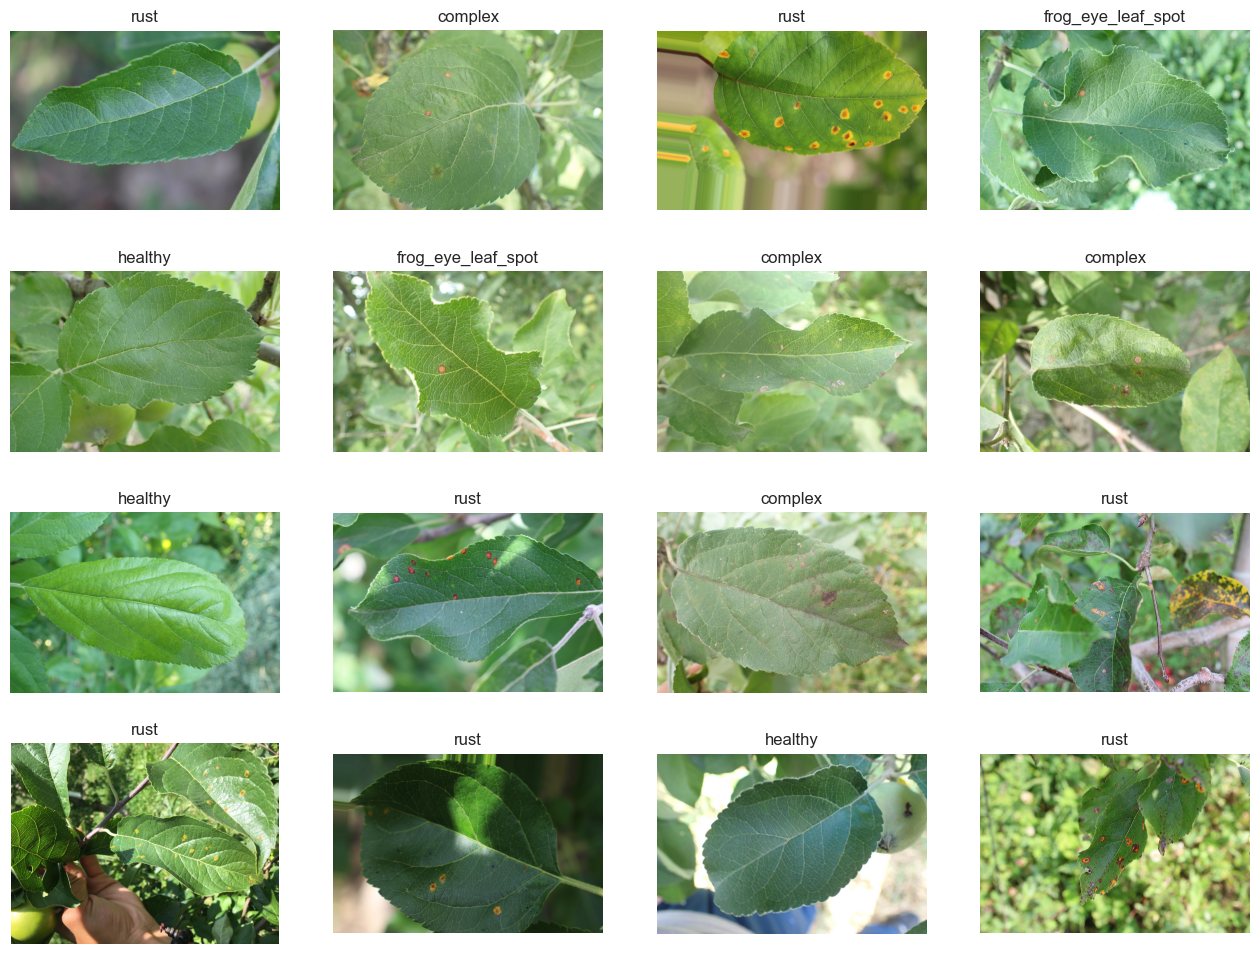

In [47]:
# Display Image Samples
show_images(train_df, train_path)

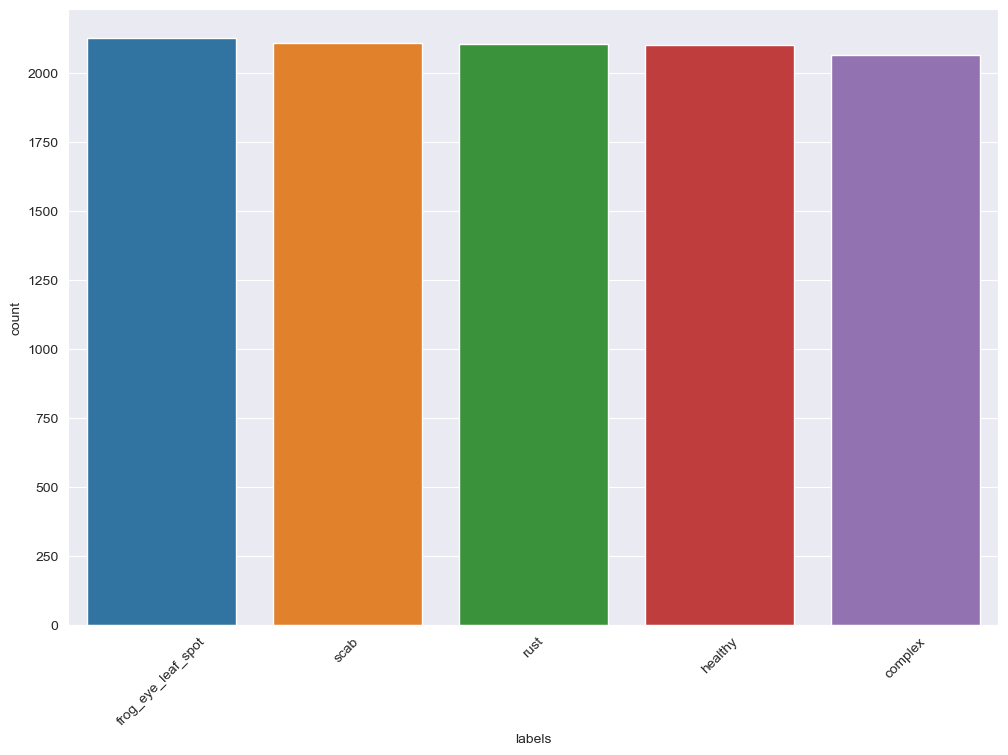

In [48]:
plot_labels(train_df)

In [50]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.ResNet101(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
for layer in base_model.layers:
        layer.trainable=False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(64, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

171446536/171446536 [==============================] - 14s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 42797829 (163.26 MB)
Trainable params: 1

In [51]:
history = model.fit(train_gen, epochs = 10, verbose = 1, validation_data = valid_gen, validation_steps = None, shuffle = False)

Epoch 1/10
263/263 [==============================] - 2256s 9s/step - loss: 3.0843 - accuracy: 0.5622 - val_loss: 2.3645 - val_accuracy: 0.7173
Epoch 2/10
263/263 [==============================] - 2346s 9s/step - loss: 2.1995 - accuracy: 0.6964 - val_loss: 1.8897 - val_accuracy: 0.7516
Epoch 3/10
263/263 [==============================] - 2339s 9s/step - loss: 1.7617 - accuracy: 0.7328 - val_loss: 1.5652 - val_accuracy: 0.7631
Epoch 4/10
263/263 [==============================] - 5051s 19s/step - loss: 1.4561 - accuracy: 0.7630 - val_loss: 1.3361 - val_accuracy: 0.7693
Epoch 5/10
263/263 [==============================] - 2416s 9s/step - loss: 1.2434 - accuracy: 0.7817 - val_loss: 1.1885 - val_accuracy: 0.7756
Epoch 6/10
263/263 [==============================] - 2426s 9s/step - loss: 1.0953 - accuracy: 0.7950 - val_loss: 1.0816 - val_accuracy: 0.7778
Epoch 7/10
263/263 [==============================] - 2921s 11s/step - loss: 0.9933 - accuracy: 0.8064 - val_loss: 1.0012 - val_accurac

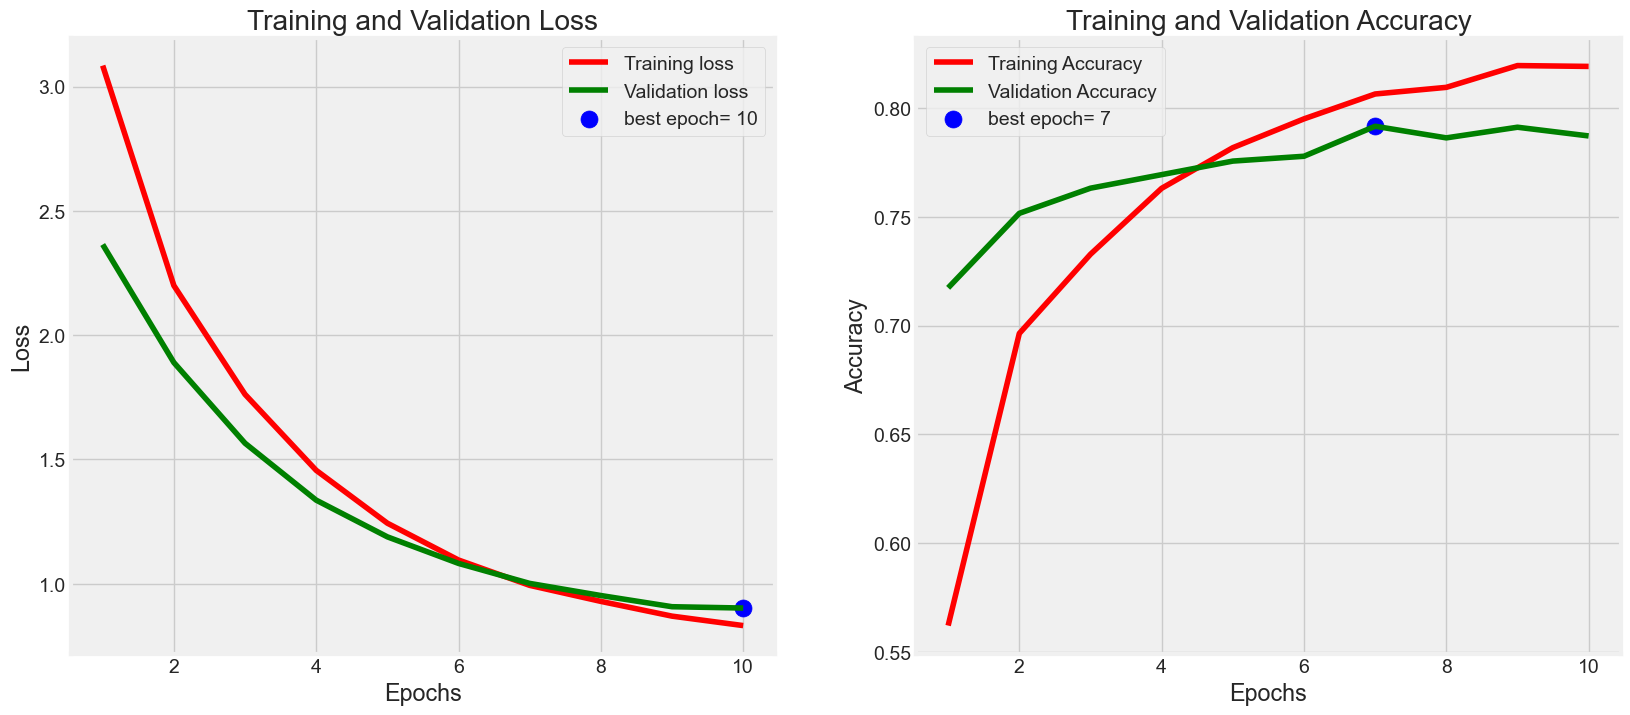

In [52]:
plot_training(history)

In [53]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

30/30 [==============================] - 550s 18s/step - loss: 0.8625 - accuracy: 0.8089
Train Loss:  0.6668297052383423
Train Accuracy:  0.8866666555404663
--------------------
Validation Loss:  0.9179747700691223
Validation Accuracy:  0.7766666412353516
--------------------
Test Loss:  0.8624623417854309
Test Accuracy:  0.8088889122009277


In [54]:
preds = model.predict_generator(test_gen, verbose = 1)
y_pred = np.argmax(preds, axis = 1)
print(y_pred)

30/30 [==============================] - 586s 19s/step
[0 1 1 ... 3 0 0]


Confusion Matrix, Without Normalization
[[372  46  11  30  25]
 [ 29 343  22   9  31]
 [  5  17 382   3  41]
 [ 29  25   2 395   7]
 [ 16  18  63   1 328]]
                    precision    recall  f1-score   support

           complex       0.82      0.77      0.80       484
frog_eye_leaf_spot       0.76      0.79      0.78       434
           healthy       0.80      0.85      0.82       448
              rust       0.90      0.86      0.88       458
              scab       0.76      0.77      0.76       426

          accuracy                           0.81      2250
         macro avg       0.81      0.81      0.81      2250
      weighted avg       0.81      0.81      0.81      2250



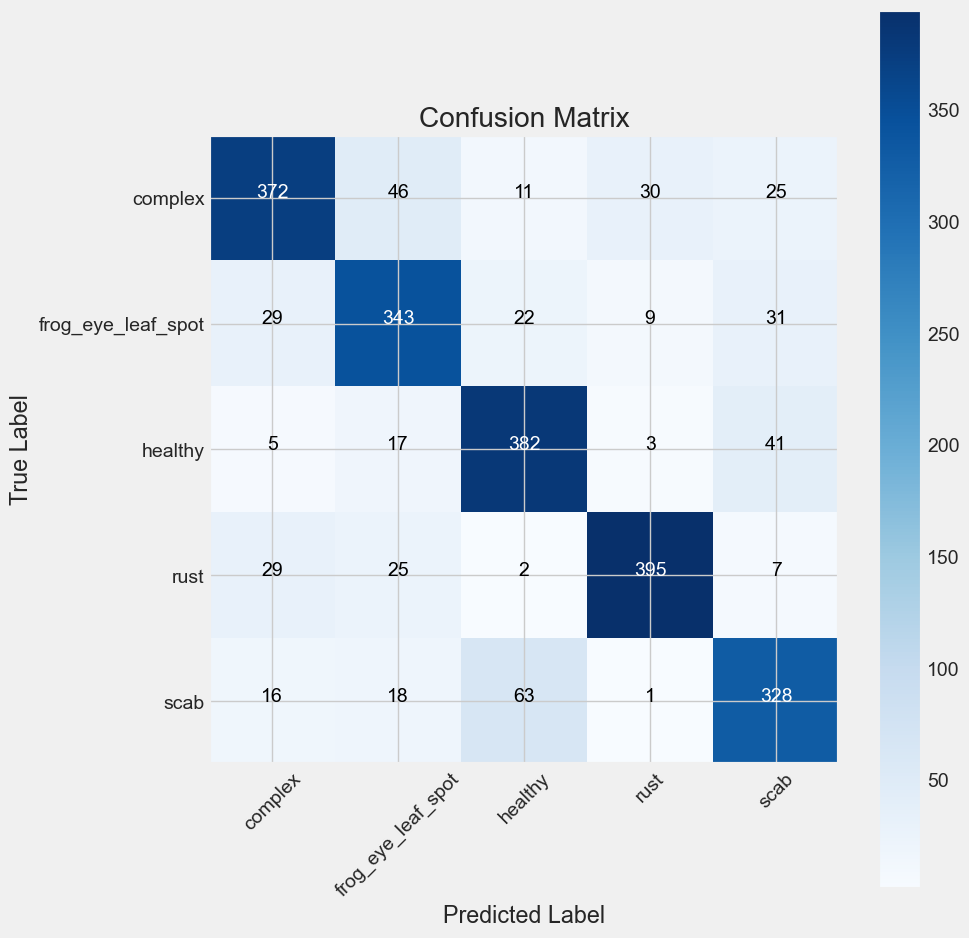

In [55]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [56]:
model_name = model.input_names[0][:-6]
subject = input('Enter Project Subject')
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

model was saved as resnet101--80.89.h5
weights were saved as resnet101--weights.h5


In [57]:
class_dict = train_gen.class_indices
img_size = train_gen.image_shape
height = []
width = []
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

Index_series = pd.Series(list(class_dict.values()), name= 'class_index')
Class_series = pd.Series(list(class_dict.keys()), name= 'class')
Height_series = pd.Series(height, name= 'height')
Width_series = pd.Series(width, name= 'width')
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis= 1)
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index= False)
print(f'class csv file was saved as {csv_save_loc}')

class csv file was saved as -class_dict.csv
